In [7]:
import pandas as pd
df_food=pd.read_csv('dataset/outWords.csv', header=None)
# df_food.head()
# append a column with value Food
df_food.rename(columns={0:'ingredient'}, inplace=True)
df_food['Type']=0   
df_food.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/outWords.csv'

In [ ]:
# impliment navie base machine learning algorithm
df_beauty=pd.read_csv('dataset/outWords_beauty_words.csv', header=None)
# Rename heading 1 to ingredient
df_beauty.rename(columns={0:'ingredient'}, inplace=True)
df_beauty['Type']=1
df_beauty.head()

In [ ]:
df_merged.groupby('Type').describe()

ingredient                      
          count unique       top freq
Type                                 
0           503    239      salt   34
1           907    496  glycerin   24

In [ ]:
df_merged['Beauty']=df_merged['Type'].apply(lambda x:1 if x=='Beauty' else 0)
df_merged.head()

,ingredient,Type,Beauty
0,water,1,0
1,water,1,0
2,water,1,0
3,water,1,0
4,water,1,0


In [ ]:
# create model
model = GaussianNB()

# train model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# accuracy
print(accuracy_score(y_test, y_pred))


0.95


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
product1 = [
    'Milk Fat' , 'Water' , 'Turmeric' , 'permitted natural color'
]
product1_count = v.transform(product1)
model.predict(product1_count)

array([0, 1, 0, 0], dtype=int64)

In [ ]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.943342776203966

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(X_test,y_test)

0.943342776203966

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(X_test))


0.943342776203966

In [ ]:
accuracy_score(y_train, clf.predict(X_train))

0.9612109744560076

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, clf.predict(X_test))
cm

array([[113,  12],
       [  8, 220]], dtype=int64)

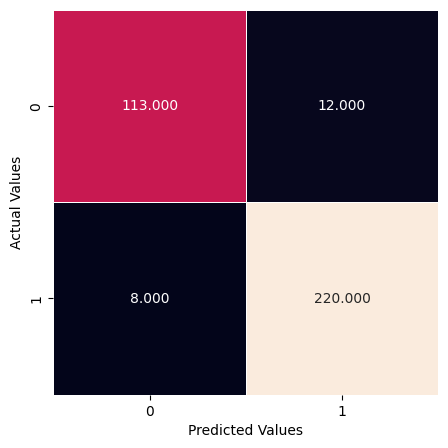

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       125
           1       0.95      0.96      0.96       228

    accuracy                           0.94       353
   macro avg       0.94      0.93      0.94       353
weighted avg       0.94      0.94      0.94       353



In [ ]:
clf.predict(product1)

array([0, 1, 0, 0], dtype=int64)